# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = "62c1e1d7d4a31c389233c152470bb8fe"


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(.50)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=hobart
Processing Record 2 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=hermanus
Processing Record 3 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=ushuaia
Processing Record 4 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=biak
Processing Record 5 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=upernavik
Processing Record 6 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=yellowknife
Processing Record 7 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 55 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=kudahuvadhoo
Processing Record 56 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=namatanai
Processing Record 57 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=samarai
Processing Record 58 | Marsabit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=marsabit
Processing Record 59 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=faanui
Processing Record 60 | Jiangyou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=jiangyou
Processing Record 61 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=a

Processing Record 111 | Hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=hovd
City not found. Skipping...
Processing Record 112 | Huanren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=huanren
Processing Record 113 | Santa Cruz Cabralia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=santa cruz cabralia
Processing Record 114 | Mapiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=mapiri
Processing Record 115 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=harper
Processing Record 116 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=arraial do cabo
Processing Record 117 | Katakwi
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 166 | Lewiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=lewiston
Processing Record 167 | Yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=yatou
Processing Record 168 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=geraldton
Processing Record 169 | Floro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=floro
Processing Record 170 | Mujiayingzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=mujiayingzi
Processing Record 171 | San Pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=san pedro
Processing Record 172 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c15247

City not found. Skipping...
Processing Record 223 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=severo-kurilsk
Processing Record 224 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=iqaluit
Processing Record 225 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=labuan
Processing Record 226 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=dingle
Processing Record 227 | Miraflores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=miraflores
Processing Record 228 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=georgetown
Processing Record 229 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units

City not found. Skipping...
Processing Record 278 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=saldanha
Processing Record 279 | Gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=gao
Processing Record 280 | Mananjary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=mananjary
Processing Record 281 | Kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=kedrovyy
Processing Record 282 | Praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=praya
Processing Record 283 | Mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=mercedes
Processing Record 284 | Taree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c3892

Processing Record 334 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=hambantota
Processing Record 335 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=ostrovnoy
Processing Record 336 | Key West
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=key west
Processing Record 337 | Satana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=satana
Processing Record 338 | Fartura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=fartura
Processing Record 339 | Trinidad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=trinidad
Processing Record 340 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8f

Processing Record 390 | Greeneville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=greeneville
City not found. Skipping...
Processing Record 391 | Cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=cururupu
City not found. Skipping...
Processing Record 392 | Red Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=red bluff
Processing Record 393 | Veraval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=veraval
Processing Record 394 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=kruisfontein
Processing Record 395 | Lunsar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=lunsar
Processing Record 396 | Srednekolymsk
http://api.openweathermap.

Processing Record 445 | Rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=rundu
Processing Record 446 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=kavieng
Processing Record 447 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=antofagasta
Processing Record 448 | Vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=vanavara
Processing Record 449 | Mpophomeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=mpophomeni
Processing Record 450 | Pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=pangody
Processing Record 451 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c1524

Processing Record 501 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=qasigiannguit
Processing Record 502 | Carnduff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=carnduff
Processing Record 503 | Guane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=guane
Processing Record 504 | Nianzishan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=nianzishan
Processing Record 505 | Zvishavane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=zvishavane
Processing Record 506 | Barranca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233c152470bb8fe&q=barranca
Processing Record 507 | Suruc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62c1e1d7d4a31c389233

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherpy_dict = {
    "City": city_name, 
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity, 
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": max_temp, 
    "Wind Speed": wind_speed
}
# Create new data frame
weather_data = pd.DataFrame(weatherpy_dict)

#count each item in dic
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [8]:
#Save data frame to CSV 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,12,AU,1571873976,55,-42.88,147.33,68.00,6.93
1,Hermanus,100,ZA,1571874020,81,-34.42,19.24,57.00,3.00
2,Ushuaia,40,AR,1571873916,50,-54.81,-68.31,57.20,11.41
3,Biak,95,ID,1571874021,74,-0.91,122.88,79.77,6.20
4,Upernavik,86,GL,1571874022,59,72.79,-56.15,21.88,10.27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

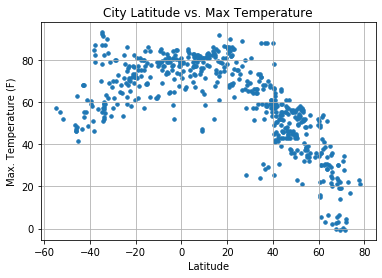

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=12)

# add the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

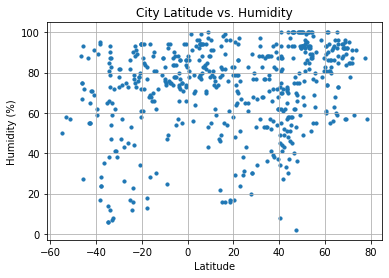

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# add the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

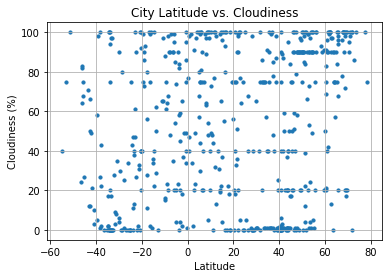

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

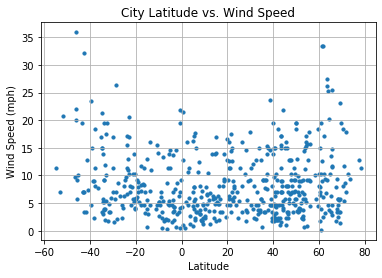

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()